In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'/Users/maxhlovitt/Desktop/Linear Final Project/train.csv')
data.shape

(42000, 785)

Visualizing Data

In [3]:
def visualize(x):
    x = x.reshape((28, 28))
    plt.gray()
    plt.imshow(x, interpolation='nearest')
    plt.show()

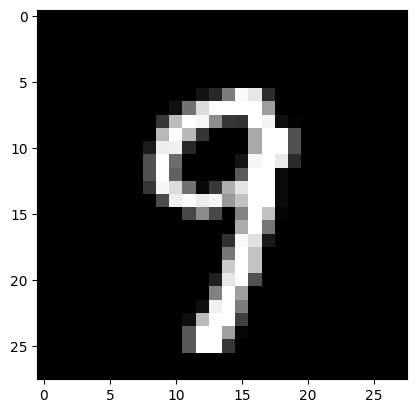

In [4]:
sample = data.sample()
sample = np.array(sample)[0]
label = sample[0]
image = sample[1:]
visualize(image)

Preparing Data

In [5]:
data = np.array(data).T
labels = data[0]
images = data[1:]

In [6]:
def one_hot(indicies, size):
    one_hot_labels = []
    for i in indicies:
        zeros = np.zeros(size)
        zeros[i] = 1
        one_hot_labels.append(zeros)
    return one_hot_labels

In [7]:
images.shape, labels.shape

((784, 42000), (42000,))

In [8]:
one_hot_labels = one_hot(labels, 10)

train_x, test_x, train_y, test_y = train_test_split(images.T, one_hot_labels)

train_x = np.array(train_x)
test_x = np.array(test_x)

train_y = np.array(train_y)
test_y = np.array(test_y)

Model Architectures

In [9]:
# Logistic Regression Model: F = softmax(Ax)
image_classifier = keras.Sequential([
    keras.layers.Input(shape=((784, ))),
    keras.layers.Dense(10, activation="softmax")
])

image_classifier.compile(
    optimizer = keras.optimizers.Adam(learning_rate=1e-3),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy()]
)

In [10]:
image_classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Non-linear Model: F = softmax(B(relu(Ax)))
non_linear = keras.Sequential([
    keras.layers.Input(shape=((784, ))),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

non_linear.compile(
    optimizer = keras.optimizers.Adam(learning_rate=1e-3),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy()]
)

In [12]:
non_linear.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Non-linear Model: F = softmax(B(relu(Ax)))
non_linear_2 = keras.Sequential([
    keras.layers.Input(shape=((784, ))),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

non_linear_2.compile(
    optimizer = keras.optimizers.Adam(learning_rate=1e-3),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy()]
)

In [14]:
non_linear_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Training Models

In [15]:
# Training Neural Models
history_1 = image_classifier.fit(train_x, train_y, epochs=10, verbose=1, batch_size=8, validation_data=(test_x, test_y))
history_2 = non_linear.fit(train_x, train_y, epochs=10, verbose=1, batch_size=8, validation_data=(test_x, test_y))
history_3 = non_linear_2.fit(train_x, train_y, epochs=10, verbose=1, batch_size=8, validation_data=(test_x, test_y))

Epoch 1/10
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1s 290us/step - categorical_accuracy: 0.7699 - loss: 19.3527 - val_categorical_accuracy: 0.8437 - val_loss: 12.8891
Epoch 2/10
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1s 260us/step - categorical_accuracy: 0.8747 - loss: 10.1697 - val_categorical_accuracy: 0.8959 - val_loss: 9.0267
Epoch 3/10
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step - categorical_accuracy: 0.8790 - loss: 9.7462 - val_categorical_accuracy: 0.8523 - val_loss: 13.1361
Epoch 4/10
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - categorical_accuracy: 0.8822 - loss: 9.6098 - val_categorical_accuracy: 0.8737 - val_loss: 11.8189
Epoch 5/10
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1s 262us/step - categorical_accuracy: 0.8907 - loss: 9.2324 - val_categorical_accuracy: 0.8879 - val_loss: 10.4107
Epoch 6/10
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1s 261us/step - categorical_accuracy: 0.8889 - loss: 9.5968 - val_categorical_accuracy: 0.8692 - val_loss: 11.7911
Epoch 7/10
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step -

Visualizing Results

In [16]:
def plot_learning_curve(histories):
    plt.figure(figsize=(12, 5))
    for history_dict, model_name in histories:
        val_acc = history_dict['val_categorical_accuracy']
        epochs = range(1, len(val_acc) + 1)
        
        plt.plot(epochs, val_acc, label=f'Accuracy, {model_name}')
    
    plt.title('Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

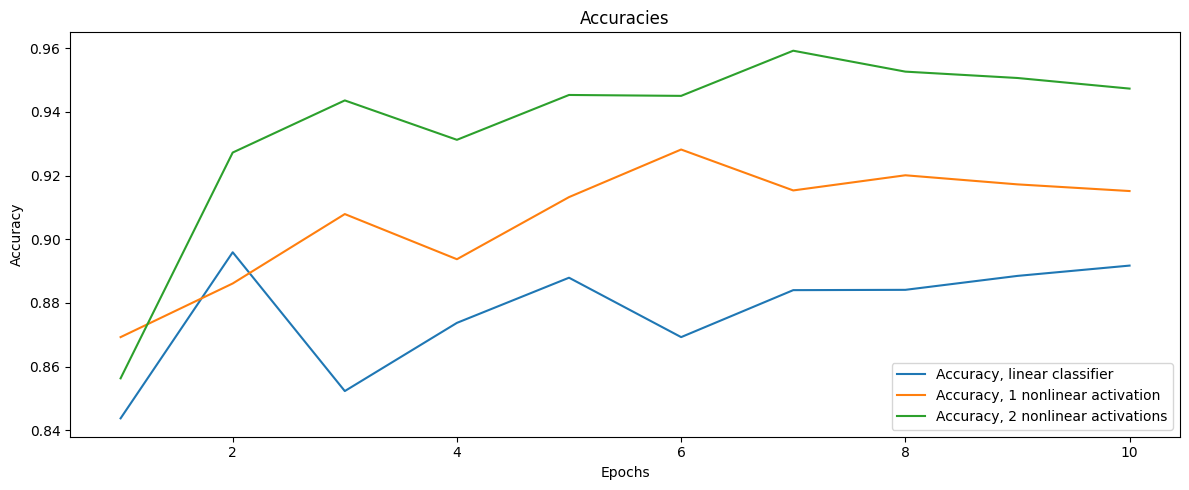

In [17]:
history_list = []
history_list.append((history_1.history, "linear classifier"))
history_list.append((history_2.history, "1 nonlinear activation"))
history_list.append((history_3.history, "2 nonlinear activations"))

plot_learning_curve(history_list)